In [1]:
import matplotlib.pyplot as plt

In [47]:
def create_plot(real, resp):
    assert(len(real) == len(resp))
    time = list(range(len(resp)))
    f = plt.figure()
    f.set_figwidth(40)
    f.set_figheight(15)

    plt.plot(time, real,'g-o', label = "real")
    plt.plot(time, resp,'r-o', label = "observation")
    plt.xlabel('Entry number')
    plt.ylabel('Observed similarity')
    plt.legend()
    
    plt.show()

In [53]:
def simple_plot(x, reysp):
    f = plt.figure()
    f.set_figwidth(40)
    f.set_figheight(15)

    plt.plot(x, y,'g-o', label = "real")
    plt.xlabel('Itteration')
    plt.ylabel('Observed difference')
    plt.legend()
    
    plt.show()

In [37]:
from dataset.loaddataset import read_csv_file_parsed, create_one_index_for_sts, read_tsv_file_parsed
parsed_data = create_one_index_for_sts(
    read_tsv_file_parsed("./dataset/sts_answer.csv")
)

In [51]:
# ===== Count Similarity =====
from comparisionEngine.cosine_similarity.word_count_sim import WordCountSim

compEngine = WordCountSim()
calculated_values = []
prediction_measure = []
size = min(50, len(parsed_data))
for data in parsed_data[:size]:
    comp_val = compEngine.wordSim(data["sentence1"], data["sentence2"])
    prediction_measure.append(comp_val)
    calculated_values.append((comp_val - data["score"]))
    print(
        "abs: {:.2f},calculation: {:.2f}, expected: {:.2f} dif: {:.2f},".format(
            abs(comp_val - data["score"]), comp_val, data["score"], (comp_val - data["score"])
        )
    )
print("avg diff : {}".format(sum(calculated_values) / size))

abs: 0.33,calculation: 0.67, expected: 1.00 dif: -0.33,
abs: 0.67,calculation: 0.67, expected: 0.00 dif: 0.67,
abs: 0.16,calculation: 0.70, expected: 0.54 dif: 0.16,
abs: 0.12,calculation: 0.92, expected: 0.80 dif: 0.12,
abs: 0.13,calculation: 0.19, expected: 0.32 dif: -0.13,
abs: 0.44,calculation: 0.80, expected: 0.36 dif: 0.44,
abs: 0.42,calculation: 0.50, expected: 0.92 dif: -0.42,
abs: 0.30,calculation: 0.64, expected: 0.94 dif: -0.30,
abs: 0.08,calculation: 0.80, expected: 0.72 dif: 0.08,
abs: 0.01,calculation: 0.85, expected: 0.84 dif: 0.01,
abs: 0.07,calculation: 0.85, expected: 0.92 dif: -0.07,
abs: 0.06,calculation: 0.70, expected: 0.64 dif: 0.06,
abs: 0.25,calculation: 0.85, expected: 0.60 dif: 0.25,
abs: 0.14,calculation: 0.62, expected: 0.48 dif: 0.14,
abs: 0.05,calculation: 0.69, expected: 0.64 dif: 0.05,
abs: 0.25,calculation: 0.67, expected: 0.92 dif: -0.25,
abs: 0.07,calculation: 0.73, expected: 0.80 dif: -0.07,
abs: 0.14,calculation: 0.82, expected: 0.96 dif: -0.14,
ab

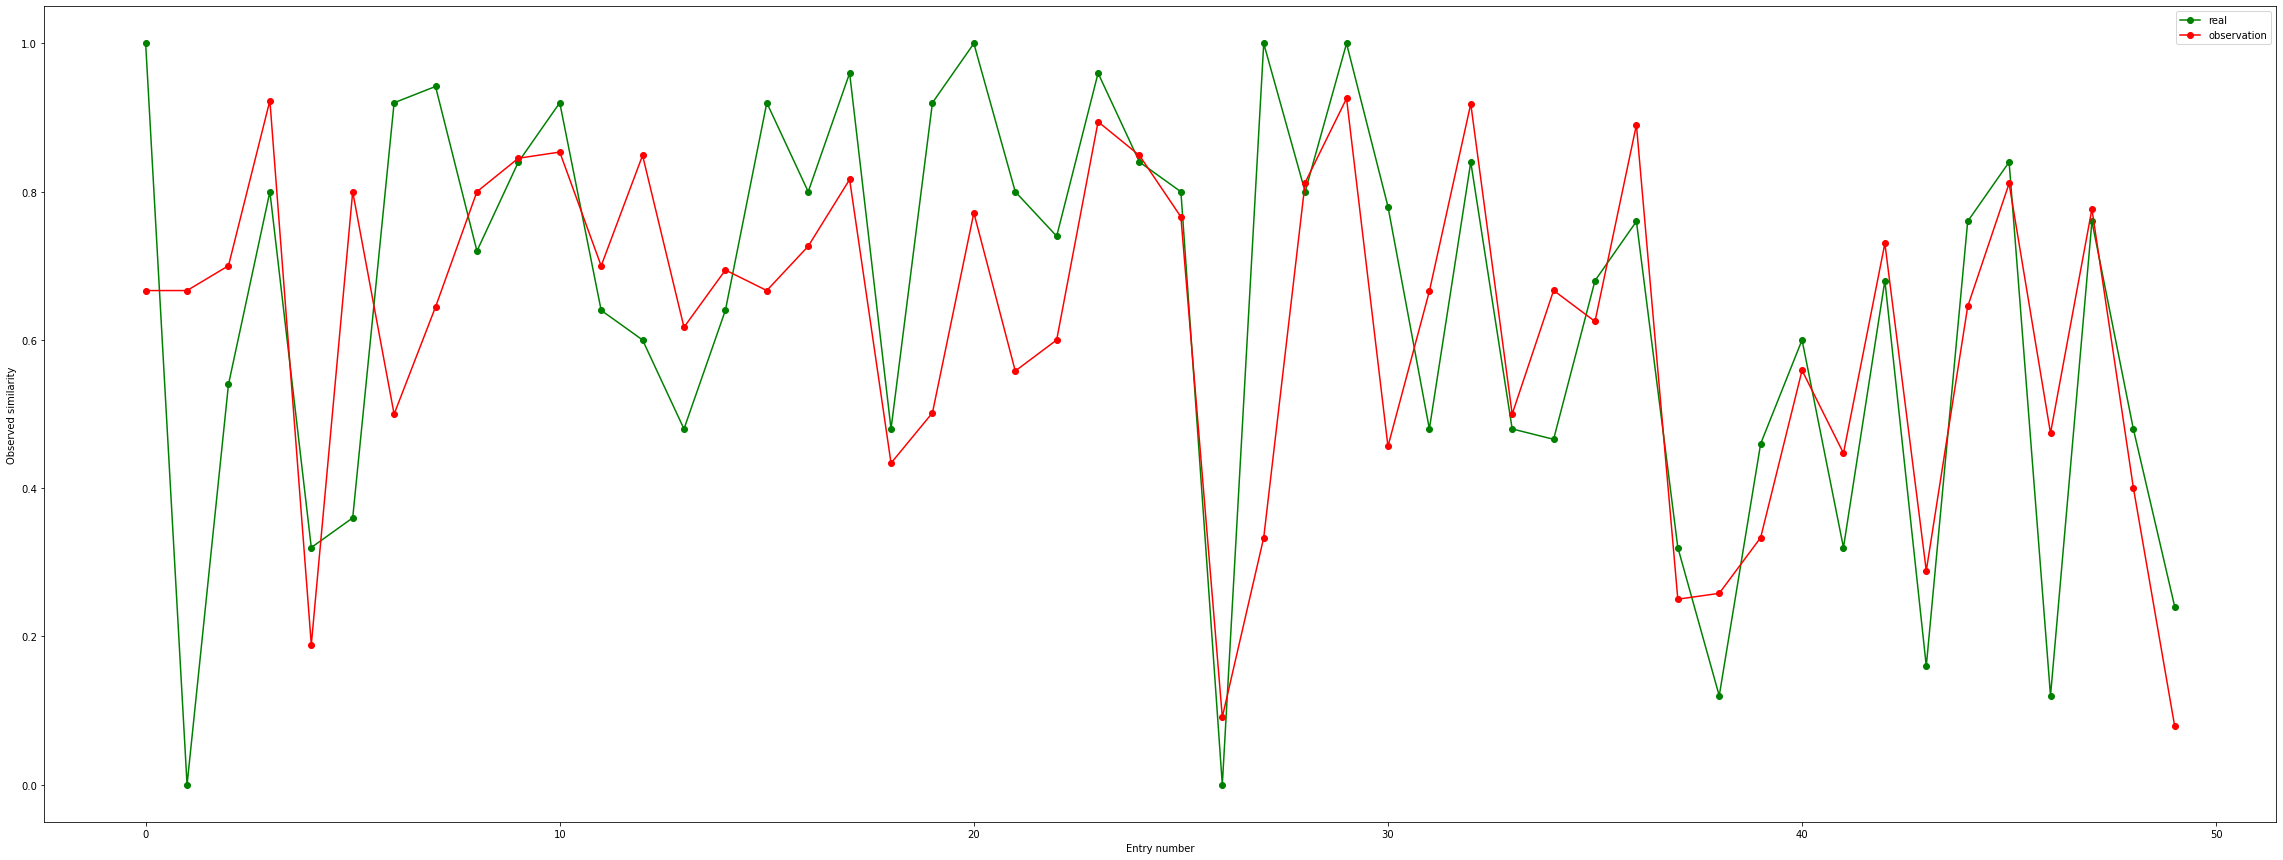

In [54]:
create_plot( [data['score'] for data in parsed_data[:size]] ,prediction_measure )

In [55]:
# ======== Tf-Idf Sim ===========
from comparisionEngine.cosine_similarity.tfidf_sim import TfidfSim
compEngine = TfidfSim()
calculated_values = []
prediction_measure = []

size = 50
for data in parsed_data[:size]:
    comp_metric = compEngine.rank_documents(data["sentence1"], [data["sentence2"]])[0]
    prediction_measure.append(comp_metric)
    calculated_values.append((comp_metric - data["score"]))
    print(
        "abs: {:.2f},calculation: {:.2f}, expected: {:.2f} dif: {:.2f},".format(
            abs(comp_metric - data["score"]), comp_metric, data["score"], (comp_metric - data["score"])
        )
    )
print("avg diff : {}".format(sum(calculated_values) / size))

abs: 1.00,calculation: 0.00, expected: 1.00 dif: -1.00,
abs: 0.00,calculation: 0.00, expected: 0.00 dif: 0.00,
abs: 0.05,calculation: 0.49, expected: 0.54 dif: -0.05,
abs: 0.01,calculation: 0.79, expected: 0.80 dif: -0.01,
abs: 0.13,calculation: 0.19, expected: 0.32 dif: -0.13,
abs: 0.35,calculation: 0.71, expected: 0.36 dif: 0.35,
abs: 0.08,calculation: 1.00, expected: 0.92 dif: 0.08,
abs: 0.35,calculation: 0.59, expected: 0.94 dif: -0.35,
abs: 0.22,calculation: 0.50, expected: 0.72 dif: -0.22,
abs: 0.06,calculation: 0.78, expected: 0.84 dif: -0.06,
abs: 0.19,calculation: 0.73, expected: 0.92 dif: -0.19,
abs: 0.33,calculation: 0.31, expected: 0.64 dif: -0.33,
abs: 0.12,calculation: 0.72, expected: 0.60 dif: 0.12,
abs: 0.07,calculation: 0.41, expected: 0.48 dif: -0.07,
abs: 0.09,calculation: 0.55, expected: 0.64 dif: -0.09,
abs: 0.08,calculation: 1.00, expected: 0.92 dif: 0.08,
abs: 0.26,calculation: 0.54, expected: 0.80 dif: -0.26,
abs: 0.04,calculation: 1.00, expected: 0.96 dif: 0.04

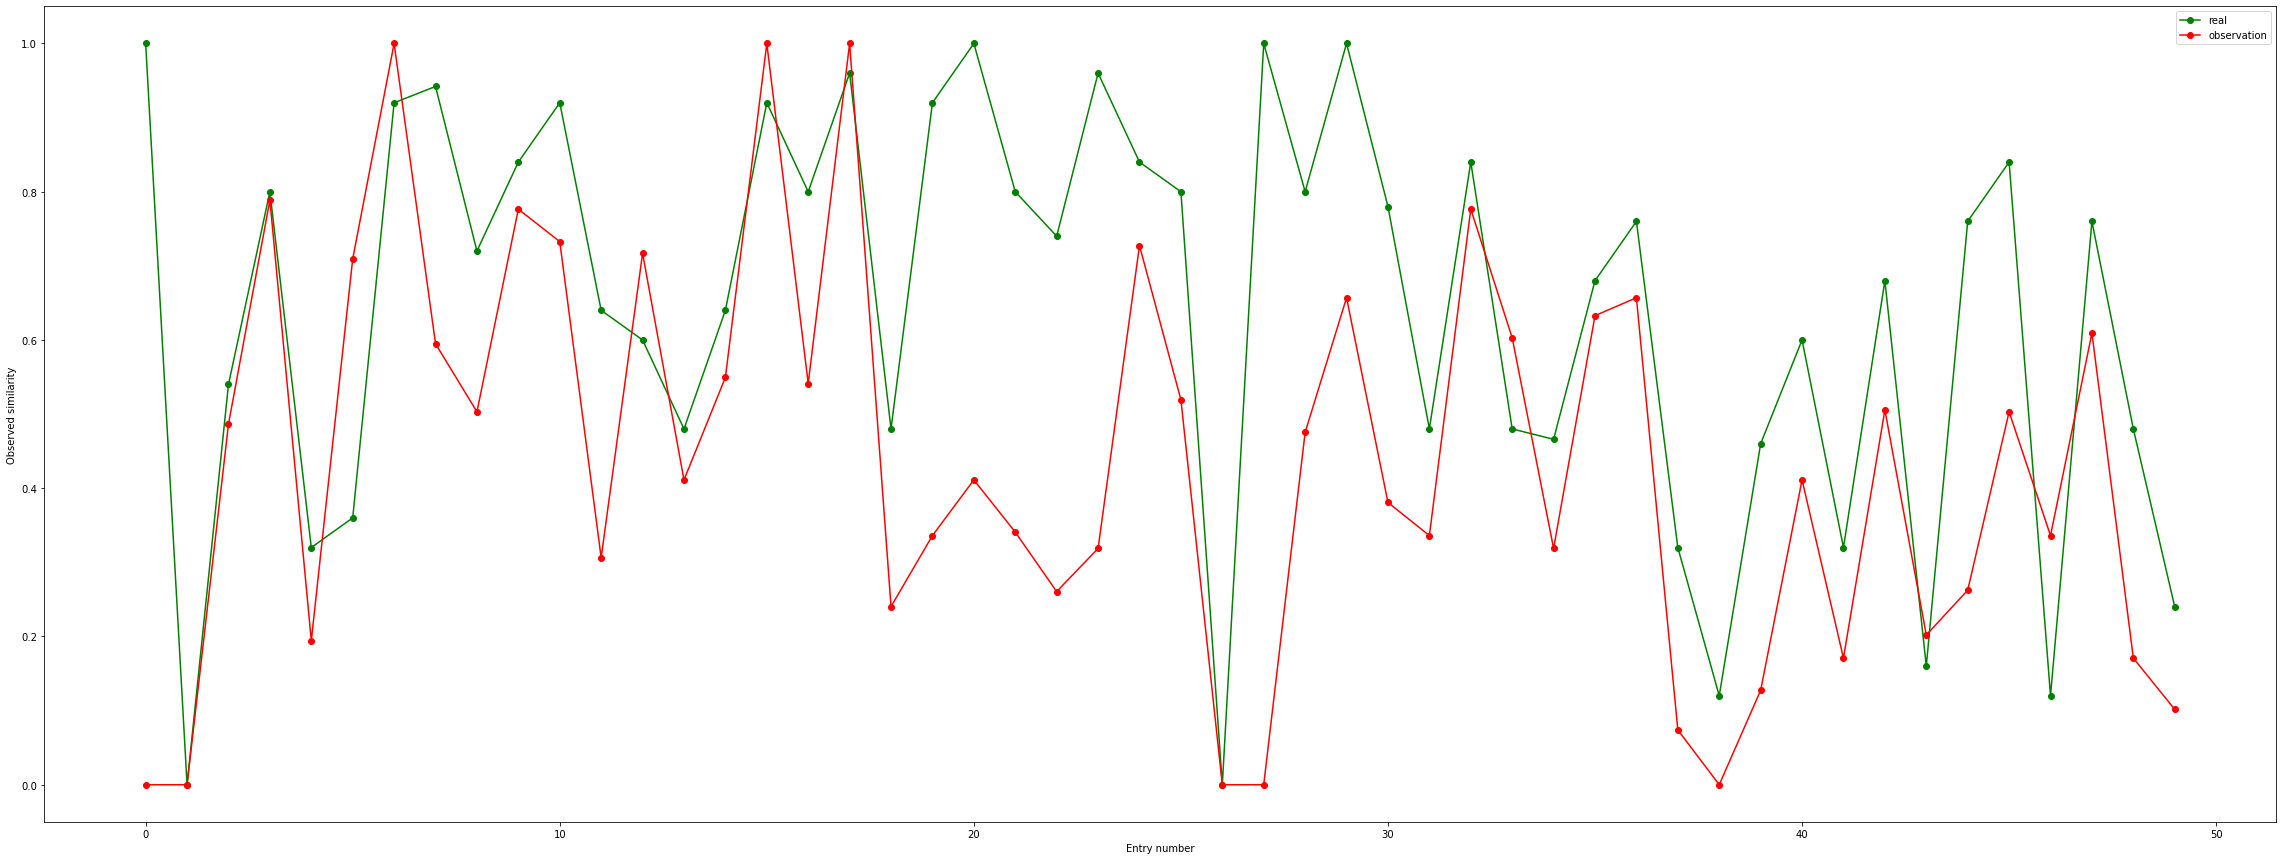

In [56]:
create_plot(
    [data['score'] for data in parsed_data[:size]],
    prediction_measure
)

In [57]:
# ======= word vec sim ==========
from comparisionEngine.cosine_similarity.word_vec_sim import DocSim
compEngine = DocSim(verbose=True)

Loading default GloVe word vector model: glove-wiki-gigaword-50
Model loaded Succesfully


In [58]:
count = 0
calculated_values = []
prediction_measure = []

size = 50
for data in parsed_data[:size]:
    try:
        similarities_array = compEngine.similarity_query(data["sentence1"], [data["sentence2"]])
        if type(similarities_array) == list:
            similarities = similarities_array[0]
        elif type(similarities_array) == float:
            similarities = similarities_array
        elif type(similarities_array) == int:
            similarities = similarities_array
        else:
            similarities = 0.0
        prediction_measure.append(similarities)
        calculated_values.append((similarities - data["score"]))
        # if abs(similarities - data["score"]) <= 0.2:
        print("{0:03}>>>".format(count), end=" ")
        count += 1
        print(
            "abs: {:.2f},calculation: {:.2f}, expected: {:.2f} dif: {:.2f}".format(
                abs(similarities - data["score"]),
                similarities,
                data["score"],
                (similarities - data["score"])
            )
        )
    except Exception as ex:
        print("======Exception Found======")
        print("...",similarities_array)
        print(ex)
        print(data)
        print("======Exception Found======")
print("avg diff : {}".format(sum(calculated_values) / size))

000>>> abs: 0.65,calculation: 0.35, expected: 1.00 dif: -0.65
001>>> abs: 0.00,calculation: 0.00, expected: 0.00 dif: 0.00


/home/hrs2203/miniconda3/envs/fuzzy/lib/python3.8/site-packages/gensim/similarities/termsim.py:358: RuntimeWarning: divide by zero encountered in true_divide
  Y = np.multiply(Y, 1 / np.sqrt(Y_norm))
/home/hrs2203/miniconda3/envs/fuzzy/lib/python3.8/site-packages/gensim/similarities/termsim.py:358: RuntimeWarning: invalid value encountered in multiply
  Y = np.multiply(Y, 1 / np.sqrt(Y_norm))


002>>> abs: 0.25,calculation: 0.29, expected: 0.54 dif: -0.25
003>>> abs: 0.80,calculation: 0.00, expected: 0.80 dif: -0.80
004>>> abs: 0.32,calculation: 0.00, expected: 0.32 dif: -0.32
005>>> abs: 0.36,calculation: 0.00, expected: 0.36 dif: -0.36
['unemployment', 'bill'] ['about the unemployment bill?']
006>>> abs: 0.08,calculation: 1.00, expected: 0.92 dif: 0.08
007>>> abs: 0.94,calculation: 0.00, expected: 0.94 dif: -0.94
008>>> abs: 0.72,calculation: 0.00, expected: 0.72 dif: -0.72
009>>> abs: 0.84,calculation: 0.00, expected: 0.84 dif: -0.84
010>>> abs: 0.92,calculation: 0.00, expected: 0.92 dif: -0.92
011>>> abs: 0.19,calculation: 0.45, expected: 0.64 dif: -0.19
012>>> abs: 0.27,calculation: 0.33, expected: 0.60 dif: -0.27
013>>> abs: 0.20,calculation: 0.28, expected: 0.48 dif: -0.20
014>>> abs: 0.64,calculation: 0.00, expected: 0.64 dif: -0.64
['make', 'sense'] ["it just doesn't make sense."]
015>>> abs: 0.08,calculation: 1.00, expected: 0.92 dif: 0.08
016>>> abs: 0.80,calculati

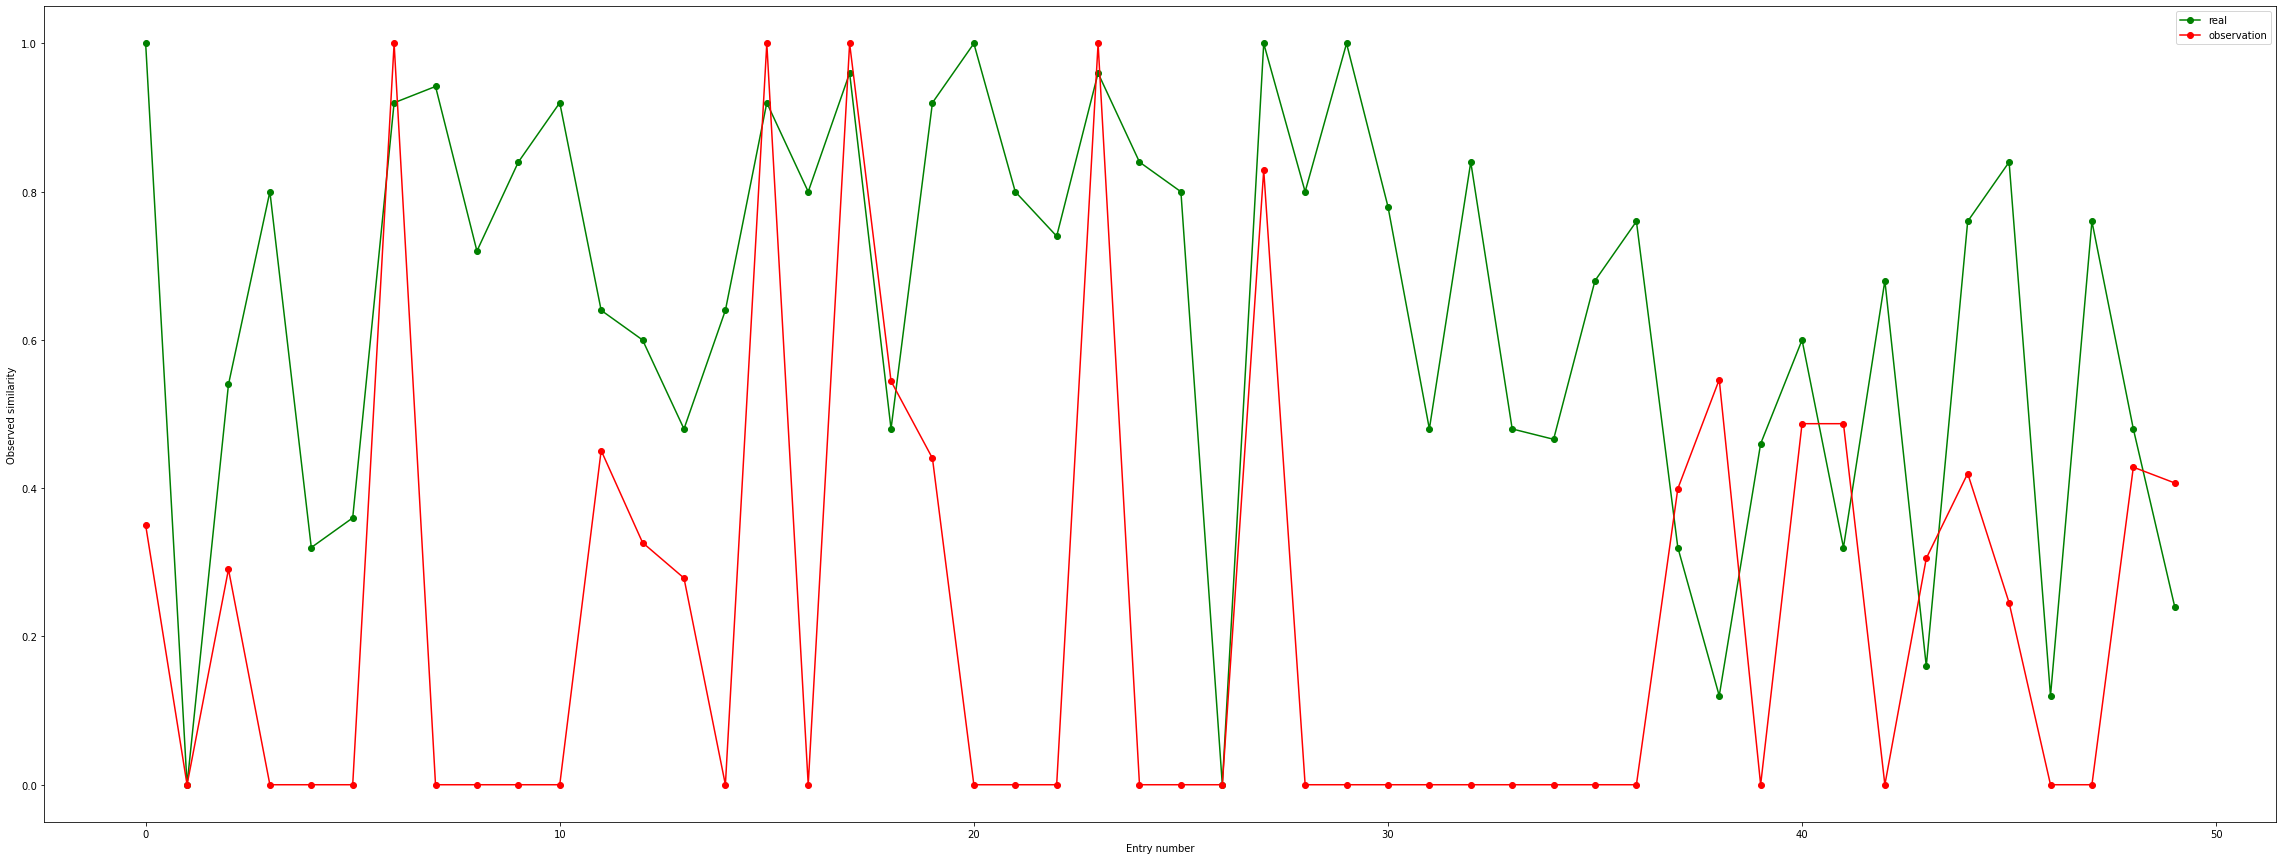

In [59]:
create_plot(
    [data['score'] for data in parsed_data[:size]],
    prediction_measure
)